In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
#
#soc-redditHyperlinks-body.tsv

In [ ]:
# Ler o arquivo TSV
file_body = open("/content/soc-redditHyperlinks-body.tsv")
df_body = pd.read_csv(file_body, sep='\t')

# Salvar o DataFrame como um arquivo CSV
arquivobody_csv = 'soc-redditHyperlinks-body.csv'
df_body.to_csv(arquivobody_csv, index=False)


FileNotFoundError: ignored

In [ ]:
df_body = pd.read_csv("/content/soc-redditHyperlinks-body.tsv")

# Criar um grafo direcionado a partir do DataFrame
F = nx.from_pandas_edgelist(df_body, source='SOURCE_SUBREDDIT', target='TARGET_SUBREDDIT', edge_attr=['POST_ID', 'LINK_SENTIMENT'], create_using=nx.DiGraph())


FileNotFoundError: ignored

In [ ]:
# Ler o arquivo TSV
#arquivo_tsv = 'seuarquivo.tsv'
file = open("/content/soc-redditHyperlinks-title.tsv")
df = pd.read_csv(file, sep='\t')

# Salvar o DataFrame como um arquivo CSV
arquivo_csv = 'soc-redditHyperlinks-title.csv'
df.to_csv(arquivo_csv, index=False)


In [ ]:
df = pd.read_csv("/content/soc-redditHyperlinks-title.csv")

# Criar um grafo direcionado a partir do DataFrame
G = nx.from_pandas_edgelist(df, source='SOURCE_SUBREDDIT', target='TARGET_SUBREDDIT', edge_attr=['POST_ID', 'LINK_SENTIMENT'], create_using=nx.DiGraph())


In [ ]:
#Grafo title
print(f"Quantidade de Nós: {nx.number_of_nodes(G)}")
print(f"Quantidade de Arestas: {nx.number_of_edges(G)}")

Quantidade de Nós: 54075
Quantidade de Arestas: 234792


In [ ]:
#Grafo body
print(f"Quantidade de Nós: {nx.number_of_nodes(F)}")
print(f"Quantidade de Arestas: {nx.number_of_edges(F)}")

NameError: ignored

In [ ]:
#Acho que é legal ter dois grafos e isso aqui pode desorganizar os dados (???)
Total = nx.disjoint_union(F, G)

In [ ]:
nx.draw_networkx(G)

KeyboardInterrupt: ignored

In [ ]:
print(f"Quantidade de Nós: {nx.number_of_nodes(Total)}")
print(f"Quantidade de Arestas: {nx.number_of_edges(Total)}")

Quantidade de Nós: 89219
Quantidade de Arestas: 369594


In [ ]:
G.is_directed()

True

In [ ]:
F.is_directed()

True

In [ ]:
#Direcionado nao pode ser conexo, nao pode calcular comp conexo tbm

In [ ]:
if nx.is_strongly_connected(G):
    diameter = nx.diameter(G)
    print(f'O diâmetro do grafo é: {diameter}')
else:
    print("O grafo não é fortemente conectado.")

O grafo não é fortemente conectado.


In [ ]:
print(f"Grau Médio: {int(sum(g for n, g in G.degree()) / nx.number_of_nodes(G))}")

Grau Médio: 8


In [ ]:
print(f"Grau Médio: {int(sum(g for n, g in F.degree()) / nx.number_of_nodes(F))}")

Grau Médio: 7


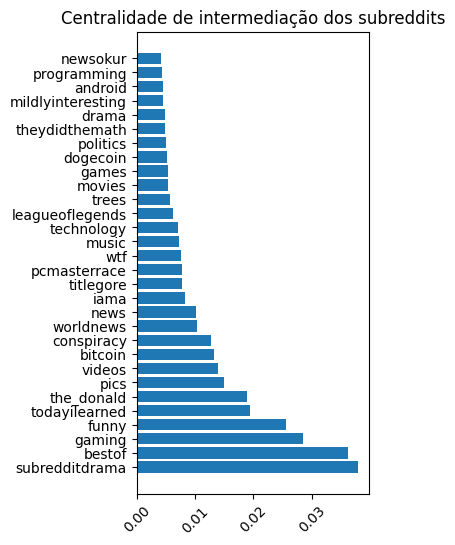

In [ ]:
# TL/DR: Betweenness centrality is a very slow calculation, so you probably want to use an approximate measure by
#considering a subset of myk nodes where myk is some number much less than the number of nodes in the network,
# but large enough to be statistically meaningful (NetworkX has an option for this: betweenness_centrality(G, k=myk).

between = nx.betweenness_centrality(G, 5407)
histograma = []
# Exiba a centralidade de intermediação de cada nó
for node, centrality in between.items():
    histograma.append([node, centrality])

histograma.sort(key=lambda x: x[1], reverse=True)

histograma = histograma[0:30]
#trocar pra 30 depois

nomes = [item[0] for item in histograma]
idades = [item[1] for item in histograma]
plt.figure(figsize=(3,6))  # Largura x Altura

# Criar um gráfico de barras
plt.barh(nomes, idades)
plt.title('Centralidade de intermediação dos subreddits')
plt.xticks(rotation=45)
# Exibir o gráfico
plt.show()

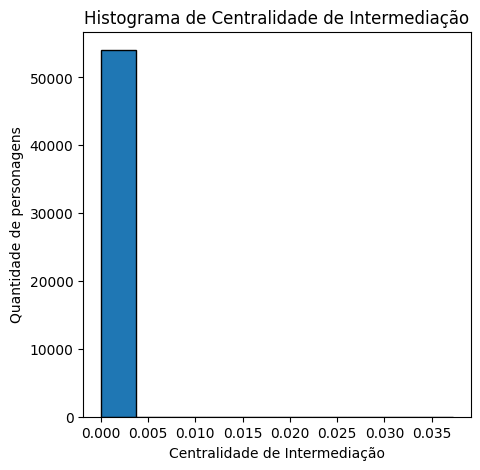

In [ ]:
between = list(between.values())
plt.figure(figsize=(5,5))  # Largura x Altura

#executar dnv dps
# Crie um histograma
plt.hist(between, bins=10, edgecolor='k')
plt.xlabel('Centralidade de Intermediação')
plt.ylabel('Quantidade de personagens')
plt.title('Histograma de Centralidade de Intermediação')
plt.show()

[['askreddit', 4164], ['iama', 3706], ['bestof', 3505], ['subredditdrama', 3297], ['funny', 2990], ['pics', 2909], ['titlegore', 2490], ['todayilearned', 2487], ['videos', 2329], ['gaming', 2070], ['the_donald', 1579], ['worldnews', 1541], ['news', 1500], ['wtf', 1416], ['drama', 1400], ['conspiracy', 1385], ['gifs', 1334], ['bitcoin', 1250], ['science', 1211], ['politics', 1171], ['movies', 1166], ['mildlyinteresting', 1108], ['pcmasterrace', 1103], ['shitredditsays', 1069], ['technology', 1008], ['adviceanimals', 992], ['showerthoughts', 932], ['switcharoo', 917], ['aww', 906], ['leagueoflegends', 882]]


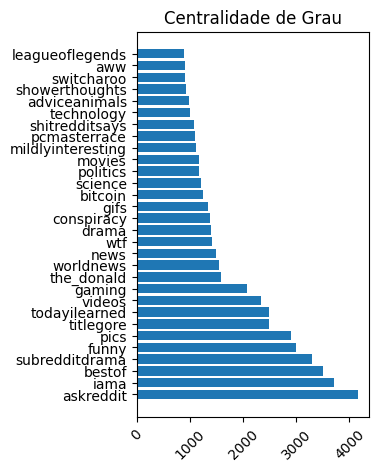

In [ ]:
centralidade_grau = []
for no in G:
  centralidade_grau.append([no, G.degree[no]])

centralidade_grau.sort(key=lambda x: x[1], reverse=True)
centralidade_grau = centralidade_grau[0:30]
print(centralidade_grau)

personagens = [item[0] for item in centralidade_grau]
graus = [item[1] for item in centralidade_grau]

plt.figure(figsize=(3,5))

plt.barh(personagens, graus)
plt.title('Centralidade de Grau')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Será que ela implicaria se a gente usasse porcentagens diferentes de sample em metricas diferentes por causa da inviabilidade técnica?
#pq eu posso usar 100% do grafo aqui

vertices_reduzidos = random.sample(G.nodes, 5407)
Greduzido = G.subgraph(vertices_reduzidos)

<ipython-input-21-b3c17fb7b06b>:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  vertices_reduzidos = random.sample(G.nodes, 5407)


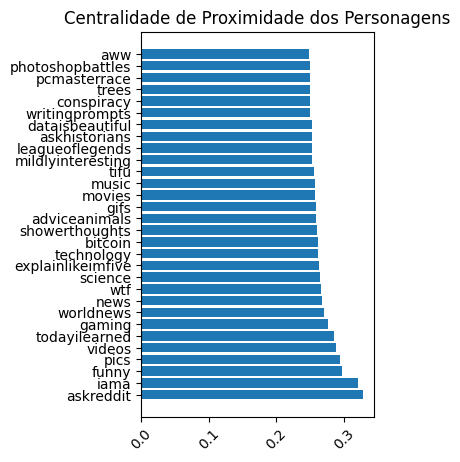

AttributeError: ignored

In [ ]:
#proximidade

lista_proximidade = []
proximidades = nx.closeness_centrality(G)

for no, prox in proximidades.items():
    lista_proximidade.append([no, prox])

lista_proximidade.sort(key=lambda x: x[1], reverse=True)
lista_proximidade = lista_proximidade[0:30]

personagens = [item[0] for item in lista_proximidade]
proximidades = [item[1] for item in lista_proximidade]

plt.figure(figsize=(3,5))
plt.barh(personagens, proximidades)
plt.title('Centralidade de Proximidade dos subreddits')
plt.xticks(rotation=45)
plt.show()

# Extraia os valores da centralidade de betweenness em uma lista
proximidades_lista = list(proximidades.items())

# Crie um histograma
plt.hist(proximidades_lista, bins=20, edgecolor='k')
plt.xlabel('Centralidade de Proximidade')
plt.ylabel('Quantidade de personagens')
plt.title('Histograma de Centralidade de Proximidade')
plt.show()

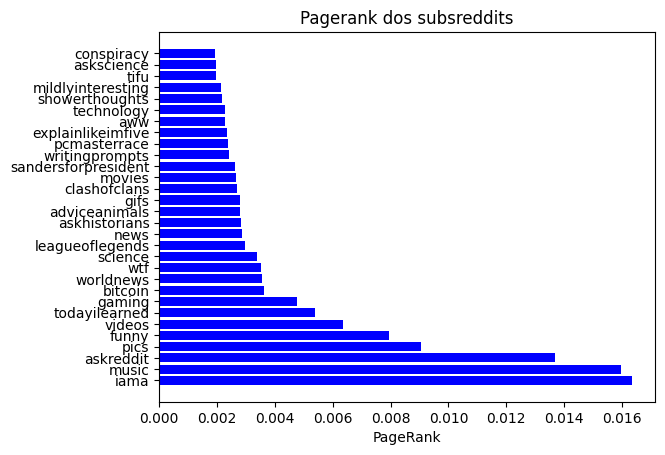

In [ ]:
pagerank = nx.pagerank(G)

sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

top_nodes, top_values = zip(*sorted_pagerank[:30])

plt.barh(top_nodes, top_values, color='blue')
plt.xlabel('PageRank')
plt.title('Pagerank dos subsreddits')
#plt.gca().invert_yaxis()
plt.show()

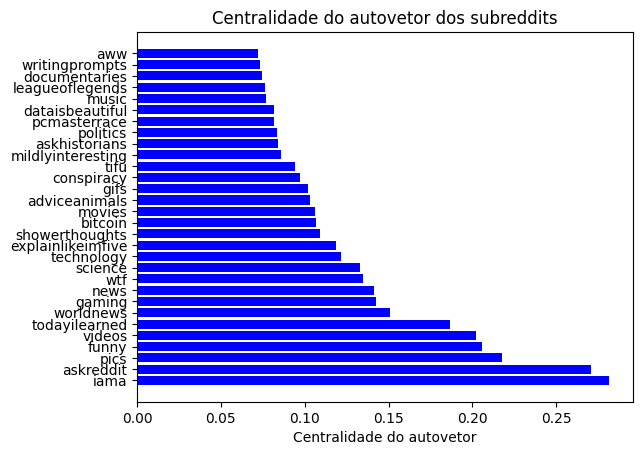

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G)

eigenvector_centrality_filtered = {node: value for node, value in eigenvector_centrality.items() if value is not None}
sorted_eigenvector_centrality = sorted(eigenvector_centrality_filtered.items(), key=lambda x: x[1], reverse=True)

top_eigenvector_nodes, top_eigenvector_values = zip(*sorted_eigenvector_centrality[:30])

plt.barh(top_eigenvector_nodes, top_eigenvector_values, color='blue')
plt.xlabel('Centralidade do autovetor')
plt.title('Centralidade do autovetor dos subreddits')
plt.show()


In [ ]:
# Certifique-se de que o grafo seja fortemente conectado
if nx.is_strongly_connected(G):
    diameter = nx.diameter(G)
    print(f'O diâmetro do grafo é: {diameter}')
else:
    print("O grafo não é fortemente conectado.")


O grafo não é fortemente conectado.


In [ ]:
print("Densidade: "+"{:.4f}".format(nx.density(G)))

Densidade: 0.0001


In [ ]:
mean_out_degree = sum(dict(G.out_degree()).values()) / len(G)
print(f"Grau de Saída Médio: {mean_out_degree:.2f}")

mean_in_degree = sum(dict(G.in_degree()).values()) / len(G)
print(f"Grau de Entrada Médio: {mean_in_degree:.2f}")

Grau de Saída Médio: 3.95
Grau de Entrada Médio: 3.95


In [ ]:
#Métricas: densidade, diametro, grau médio, é direcionado?, grau de saída médio, grau de entrada média, componentes conexos, centralidades (intermediação,),
#vértices com o maior número de interações, carinha com o maior grau, histograma de graus, pagerank,

In [ ]:
#é 0.12 na vdd

clustering_coefficient = nx.average_clustering(G)
print(f"Coeficiente de Aglomeração Médio: {clustering_coefficient:.2f}")


Coeficiente de Aglomeração Médio: 0.13


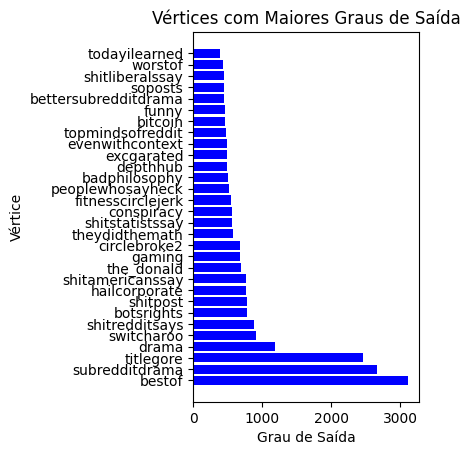

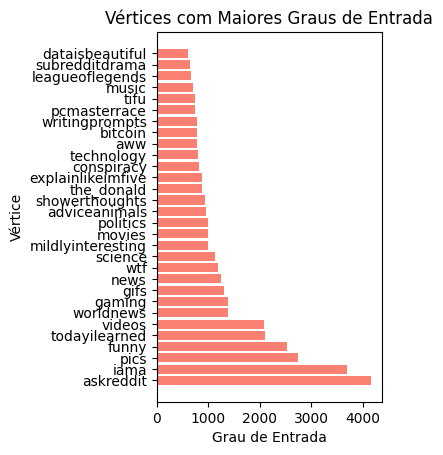

In [ ]:
#maiores graus de saída
top_outdegree_nodes = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:30]

#maiores graus de entrada
top_indegree_nodes = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:30]
top_outdegree_values = [outdegree for node, outdegree in top_outdegree_nodes]
top_indegree_values = [indegree for node, indegree in top_indegree_nodes]

# Crie gráficos de barras para os 30 nós com maiores graus de saída
plt.subplot(121)
plt.barh(range(len(top_outdegree_nodes)), top_outdegree_values, color='blue')
plt.ylabel('Vértice')
plt.xlabel('Grau de Saída')
plt.title('Vértices com Maiores Graus de Saída')
plt.yticks(range(len(top_outdegree_nodes)), [node for node, outdegree in top_outdegree_nodes])
plt.show()

# Crie gráficos de barras para os 30 nós com maiores graus de entrada
plt.subplot(122)
plt.barh(range(len(top_indegree_nodes)), top_indegree_values, color='salmon')
plt.ylabel('Vértice')
plt.xlabel('Grau de Entrada')
plt.title('Vértices com Maiores Graus de Entrada')
plt.yticks(range(len(top_indegree_nodes)), [node for node, indegree in top_indegree_nodes])
plt.show()


In [ ]:
#Já falhou com 10 mil interações então não tenho certeza se dá pra continuar tentando

katz_centrality = nx.katz_centrality(G, max_iter=54075)
top_katz_nodes = sorted(katz_centrality, key=katz_centrality.get, reverse=True)[:30]
top_katz_values = [katz_centrality[node] for node in top_katz_nodes]

plt.bar(range(len(top_katz_nodes)), top_katz_values, color='blue')
plt.xlabel('Vértice')
plt.ylabel('Centralidade de Katz')
plt.title('Centralidade de Katz dos subreddits')
plt.xticks(range(len(top_katz_nodes)), top_katz_nodes, rotation=90)
plt.show()


KeyboardInterrupt: ignored

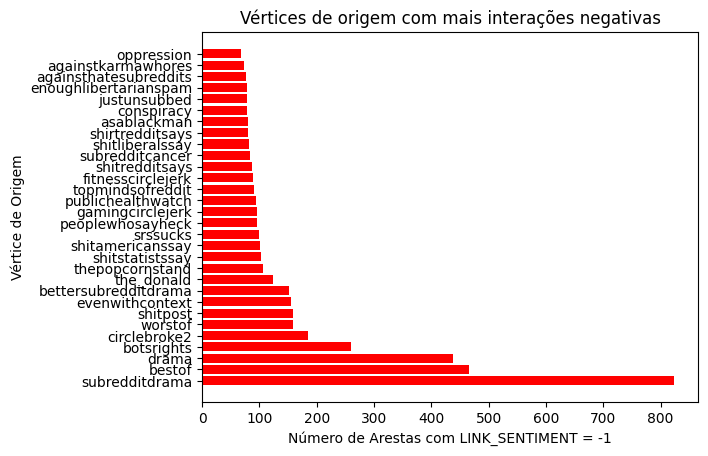

In [ ]:
nodes_with_negative_sentiment = [node for node, _, data in G.edges(data=True) if data.get('LINK_SENTIMENT') == -1]

node_counts = {node: nodes_with_negative_sentiment.count(node) for node in set(nodes_with_negative_sentiment)}

top_negative_sentiment_nodes = sorted(node_counts.items(), key=lambda x: x[1], reverse=True)[:30]

top_negative_sentiment_nodes, top_negative_sentiment_values = zip(*top_negative_sentiment_nodes)

plt.barh(range(len(top_negative_sentiment_nodes)), top_negative_sentiment_values, color='Red')
plt.ylabel('Vértice de Origem')
plt.xlabel('Número de Arestas com LINK_SENTIMENT = -1')
plt.title('Vértices de entrada com mais interações negativas')
plt.yticks(range(len(top_negative_sentiment_nodes)), top_negative_sentiment_nodes)
plt.show()


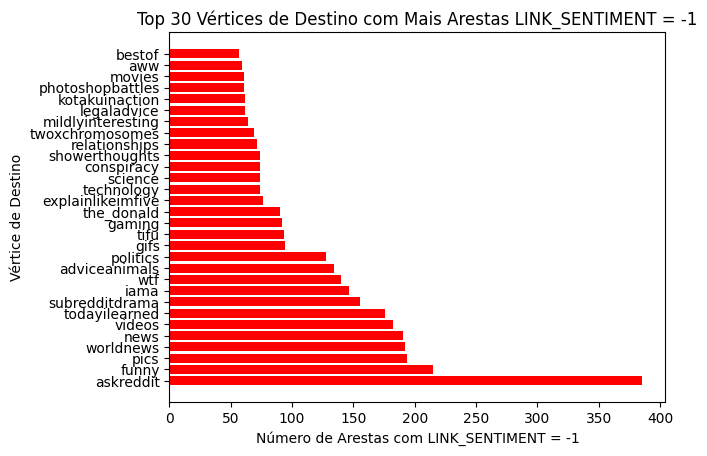

In [ ]:
#FAZER COM O TITULO CERTO
nodes_with_negative_sentiment = [node for _, node, data in G.edges(data=True) if data.get('LINK_SENTIMENT') == -1]

# Conte a ocorrência de cada nó
node_counts = {node: nodes_with_negative_sentiment.count(node) for node in set(nodes_with_negative_sentiment)}

# Obtenha os 30 nós com mais ocorrências de LINK_SENTIMENT igual a -1
top_negative_sentiment_nodes = sorted(node_counts.items(), key=lambda x: x[1], reverse=True)[:30]

# Extraia os valores correspondentes
top_negative_sentiment_nodes, top_negative_sentiment_values = zip(*top_negative_sentiment_nodes)

# Crie um gráfico de barras horizontais
plt.barh(range(len(top_negative_sentiment_nodes)), top_negative_sentiment_values, color='red')
plt.xlabel('Número de Arestas com LINK_SENTIMENT = -1')
plt.ylabel('Vértice de Destino')
plt.title('Vértices de saída com mais interações negativas')
plt.yticks(range(len(top_negative_sentiment_nodes)), top_negative_sentiment_nodes)
plt.show()


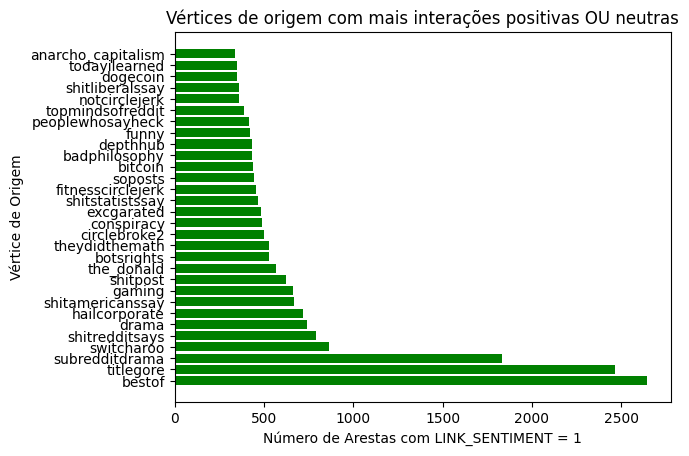

In [ ]:
nodes_with_positive_sentiment = [node for node, _, data in G.edges(data=True) if data.get('LINK_SENTIMENT') == 1]

node_counts = {node: nodes_with_positive_sentiment.count(node) for node in set(nodes_with_positive_sentiment)}

top_positive_sentiment_nodes = sorted(node_counts.items(), key=lambda x: x[1], reverse=True)[:30]

top_positive_sentiment_nodes, top_positive_sentiment_values = zip(*top_positive_sentiment_nodes)

plt.barh(range(len(top_positive_sentiment_nodes)), top_positive_sentiment_values, color='green')
plt.ylabel('Vértice de Origem')
plt.xlabel('Número de Arestas com LINK_SENTIMENT = 1')
plt.title('Vértices de entrada com mais interações positivas OU neutras')
plt.yticks(range(len(top_positive_sentiment_nodes)), top_positive_sentiment_nodes)
plt.show()

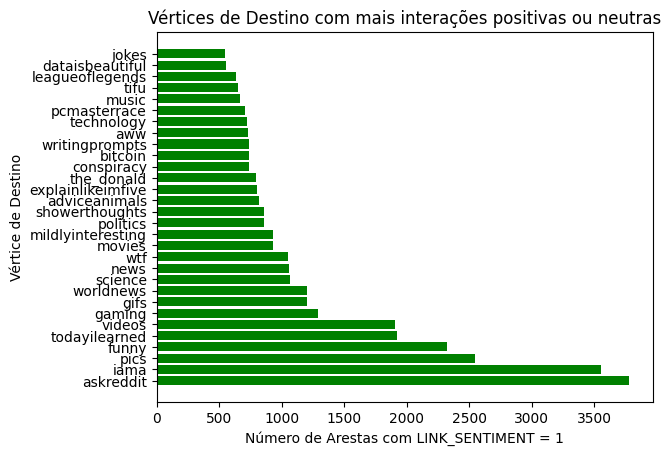

In [ ]:
# Obtenha os nós de destino com mais arestas LINK_SENTIMENT igual a -1
nodes_with_positive_sentiment = [node for _, node, data in G.edges(data=True) if data.get('LINK_SENTIMENT') == 1]

# Conte a ocorrência de cada nó
node_counts = {node: nodes_with_positive_sentiment.count(node) for node in set(nodes_with_positive_sentiment)}

# Obtenha os 30 nós com mais ocorrências de LINK_SENTIMENT igual a -1
top_positive_sentiment_nodes = sorted(node_counts.items(), key=lambda x: x[1], reverse=True)[:30]

# Extraia os valores correspondentes
top_positive_sentiment_nodes, top_positive_sentiment_values = zip(*top_positive_sentiment_nodes)

# Crie um gráfico de barras horizontais
plt.barh(range(len(top_positive_sentiment_nodes)), top_positive_sentiment_values, color='green')
plt.xlabel('Número de Arestas com LINK_SENTIMENT = 1')
plt.ylabel('Vértice de Destino')
plt.title('Vértices de saída com mais interações positivas ou neutras')
plt.yticks(range(len(top_positive_sentiment_nodes)), top_positive_sentiment_nodes)
plt.show()